In [ ]:
import tweepy
 
# Add Twitter API key and secret
consumer_key = "AvIHKD0BW6iliU3KaymYcvNS5"
consumer_secret = "6jSygH883VhpywP4MesL82SX9JmbXuEJRf9CoDgdAwBJqNgV3Q"
 
# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
 
# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
consulta_tweet= input("Buscar:")

Buscar:Bitcoin price


In [ ]:
for tweet in tweepy.Cursor(api.search, q=consulta_tweet).items(3):
  tweet_id = tweet.id
  print(tweet.text)
  print(tweet_id)

just off the phone with the CEO of #Bitcoin

confirmed the price could indeed go higher or lower, stack accordingly 👏
1536011109232164865
#Bitcoin Last Price $28116 #BTC 🚀
Daily Indicators:
-RSI: 37.9
-MA(20): 29863
-MA(50): 32285
-MA(200): 40826
-Bolli… https://t.co/VcOBmIARmZ
1536011072125210624
Amid Crypto price crash, avowed @foxandfriends cryptoevangelist Pete Hegseth promotes @Bitcoin credit card

PETE: I… https://t.co/FU1RUYMxwy
1536011033952804865


In [ ]:
import pandas as pd

tweets_number = 6000
tweets_text = []

for tweet in tweepy.Cursor(api.search, q=consulta_tweet, lang="en").items(tweets_number):
    tweets_text.append(tweet.text)


In [ ]:
#Creamos el Dataframe

data = { 'tweet_text': tweets_text}
encabezados = ['tweet_text']

df = pd.DataFrame(data, columns = encabezados)
df.index.name='id'
print(df)
 

                                             tweet_text
id                                                     
0     just off the phone with the CEO of #Bitcoin\n\...
1     Amid Crypto price crash, avowed @foxandfriends...
2     - \nBTC price: $28,139 / £22,846 \n\n35.54 Nak...
3     RT @saylor: Today's news: (a) CPI understates ...
4     RT @AltcoinDailyio: Price your life in fiat. Y...
...                                                 ...
5995  RT @Breedlove22: If this #Bitcoin bear market ...
5996  Current Price:\n#Bitcoin:$28,452.95\n#Litecoin...
5997  RT @AltcoinDailyio: Price your life in fiat. Y...
5998  - \nBTC price: $28,479 / £22,661 \n\n35.11 Nak...
5999  RT @binance: ETF, short for 'exchange-traded f...

[6000 rows x 1 columns]


In [ ]:
df.to_csv('tweets.csv', index=False)

In [ ]:
df2 = pd.read_csv("tweets.csv")
df2

,tweet_text
0,just off the phone with the CEO of #Bitcoin\n\...
1,"Amid Crypto price crash, avowed @foxandfriends..."
2,"- \nBTC price: $28,139 / £22,846 \n\n35.54 Nak..."
3,RT @saylor: Today's news: (a) CPI understates ...
4,RT @AltcoinDailyio: Price your life in fiat. Y...
...,...
5995,RT @Breedlove22: If this #Bitcoin bear market ...
5996,"Current Price:\n#Bitcoin:$28,452.95\n#Litecoin..."
5997,RT @AltcoinDailyio: Price your life in fiat. Y...
5998,"- \nBTC price: $28,479 / £22,661 \n\n35.11 Nak..."


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re


In [ ]:
#Creamos una funcion para limpiar ciertos caracteres en los tweets.

def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+' ," ",text)
  text=re.sub(r'#'," ", text)
  text=re.sub(r'RT[\s]+'," ", text)
  text=re.sub(r'https?:\/\/\S+'," ", text)
  text=re.sub(r'[^\w\s,]'," ", text) 
  return text


df2['tweet_text'] = df['tweet_text'].apply(cleanTxt)
df2

,tweet_text
0,just off the phone with the CEO of Bitcoin\n\...
1,"Amid Crypto price crash, avowed cryptoevange..."
2,"\nBTC price 28,139 22,846 \n\n35 54 Nak..."
3,Today s news a CPI understates inflation...
4,Price your life in fiat You get poorer \n\...
...,...
5995,If this Bitcoin bear market rhymes with hi...
5996,"Current Price \n Bitcoin 28,452 95\n Litecoin..."
5997,Price your life in fiat You get poorer \n\...
5998,"\nBTC price 28,479 22,661 \n\n35 11 Nak..."


In [ ]:
from textblob import TextBlob

df2['polaridad']=df2['tweet_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2

,tweet_text,polaridad
0,just off the phone with the CEO of Bitcoin\n\...,0.325000
1,"Amid Crypto price crash, avowed cryptoevange...",0.000000
2,"\nBTC price 28,139 22,846 \n\n35 54 Nak...",0.166667
3,Today s news a CPI understates inflation...,-0.031250
4,Price your life in fiat You get poorer \n\...,0.000000
...,...,...
5995,If this Bitcoin bear market rhymes with hi...,0.000000
5996,"Current Price \n Bitcoin 28,452 95\n Litecoin...",0.000000
5997,Price your life in fiat You get poorer \n\...,0.000000
5998,"\nBTC price 28,479 22,661 \n\n35 11 Nak...",0.166667


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


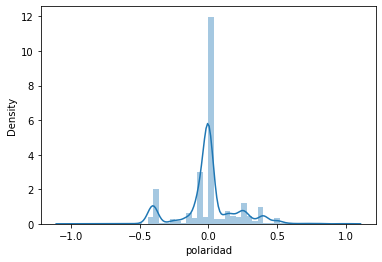

In [ ]:
import seaborn as sns

sns.distplot(df2['polaridad'])



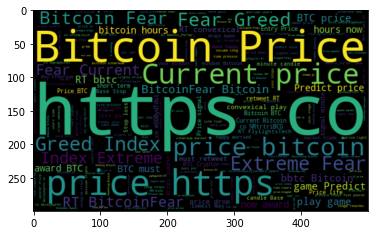

In [ ]:
#Plot de World Cloud
allWorlds=' '.join([twts for twts in df['tweet_text']])
wordCloud = WordCloud(width = 500, height=300, random_state= 21, max_font_size=119).generate(allWorlds)
plt.imshow(wordCloud, interpolation="bilinear")


In [ ]:
#Se crea una función para analizar los tweets como positivos, negativos o neutros
def getAnalysis(polaridad):
  if polaridad < 0:
     return "Negativo"
  elif polaridad == 0:
     return "Neutro"
  else:
     return "Positivo"

df2['Puntuacion'] = df2['polaridad'].apply(getAnalysis)
df2

,tweet_text,polaridad,Puntuacion
0,just off the phone with the CEO of Bitcoin\n\...,0.325000,Positivo
1,"Amid Crypto price crash, avowed cryptoevange...",0.000000,Neutro
2,"\nBTC price 28,139 22,846 \n\n35 54 Nak...",0.166667,Positivo
3,Today s news a CPI understates inflation...,-0.031250,Negativo
4,Price your life in fiat You get poorer \n\...,0.000000,Neutro
...,...,...,...
5995,If this Bitcoin bear market rhymes with hi...,0.000000,Neutro
5996,"Current Price \n Bitcoin 28,452 95\n Litecoin...",0.000000,Neutro
5997,Price your life in fiat You get poorer \n\...,0.000000,Neutro
5998,"\nBTC price 28,479 22,661 \n\n35 11 Nak...",0.166667,Positivo


In [ ]:
df2["Puntuacion"].value_counts()

Neutro      2800
Negativo    1782
Positivo    1418
Name: Puntuacion, dtype: int64

In [ ]:
# Se obtiene el total de palabras presentes en el dataset
list_of_words = []
for i in df2['tweet_text']:
    for j in i:
        list_of_words.append(j)

In [ ]:
# Se obtiene el numero total de palabras unicas
total_words = len(list(set(list_of_words)))
total_words

123

In [ ]:
#Se aplica TfidVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from  nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 10000, min_df=7, max_df=0.8, stop_words=stopwords.words('english') )
processed_features = vectorizer.fit_transform(df2['tweet_text']).toarray() 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Se separan los datos de testeo y entrenamiento 
bitcoin_df=df2
X = processed_features
y = bitcoin_df['Puntuacion']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
#Se aplica y carga modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
predictions=text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[301  32   9]
 [  2 556  15]
 [  5  44 236]]
              precision    recall  f1-score   support

    Negativo       0.98      0.88      0.93       342
      Neutro       0.88      0.97      0.92       573
    Positivo       0.91      0.83      0.87       285

    accuracy                           0.91      1200
   macro avg       0.92      0.89      0.91      1200
weighted avg       0.91      0.91      0.91      1200

0.9108333333333334


In [ ]:
#Se carga y aplica modelo SVM
from sklearn import svm
text_svm = svm.SVC(kernel='linear', probability=True)
text_svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
predictions_svm=text_svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_svm))
print(classification_report(y_test,predictions_svm))
print(accuracy_score(y_test,predictions_svm))

[[299  29  14]
 [  9 541  23]
 [  6  39 240]]
              precision    recall  f1-score   support

    Negativo       0.95      0.87      0.91       342
      Neutro       0.89      0.94      0.92       573
    Positivo       0.87      0.84      0.85       285

    accuracy                           0.90      1200
   macro avg       0.90      0.89      0.89      1200
weighted avg       0.90      0.90      0.90      1200

0.9


In [ ]:
#Se carga y aplica modelo regresión logistica multivariable
from sklearn import linear_model
from sklearn import model_selection

text_logistic = linear_model.LogisticRegression()
text_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions_logistic=text_logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_logistic))
print(classification_report(y_test,predictions_logistic))
print(accuracy_score(y_test,predictions_logistic))

[[295  29  18]
 [  7 539  27]
 [  5  51 229]]
              precision    recall  f1-score   support

    Negativo       0.96      0.86      0.91       342
      Neutro       0.87      0.94      0.90       573
    Positivo       0.84      0.80      0.82       285

    accuracy                           0.89      1200
   macro avg       0.89      0.87      0.88      1200
weighted avg       0.89      0.89      0.89      1200

0.8858333333333334


In [ ]:
from sklearn.naive_bayes import MultinomialNB

text_naive = MultinomialNB().fit(X_train, y_train)
predictions_naive=text_naive.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_naive))
print(classification_report(y_test,predictions_naive))
print(accuracy_score(y_test,predictions_naive))

[[280  36  26]
 [  7 537  29]
 [  3  68 214]]
              precision    recall  f1-score   support

    Negativo       0.97      0.82      0.89       342
      Neutro       0.84      0.94      0.88       573
    Positivo       0.80      0.75      0.77       285

    accuracy                           0.86      1200
   macro avg       0.87      0.84      0.85      1200
weighted avg       0.86      0.86      0.86      1200

0.8591666666666666


In [ ]:
#Aplicando modelo LSTM

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical


# Se separan los datos de testeo y entrenamiento 

bitcoin_lstm=df2

X = bitcoin_lstm['tweet_text']
y = pd.get_dummies(bitcoin_lstm['Puntuacion']).values

print('Shape of label tensor:', y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


Shape of label tensor: (6000, 3)


In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5400,) (5400, 3)
(600,) (600, 3)


In [ ]:

# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
print("El encoding por documento\n", X_train[1:2],"\n is: ", train_sequences[1])

El encoding por documento
 3029       Crypto BloodBath Likely To Continue with Bi...
Name: tweet_text, dtype: object 
 is:  [25, 11, 68, 2, 1, 8, 116]


In [ ]:
# Añdiendo padding al training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [ 2  1 13 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
The padded encoding for document: 2  is: [ 25  11  68   2   1   8 116   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
The padded encoding for document: 3  is: [25  2 70  1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]


In [ ]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 550))

# Bi-Directional RNN y LSTM
model.add(LSTM(300))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 550)         67650     
                                                                 
 lstm_5 (LSTM)               (None, 300)               1021200   
                                                                 
 dense_10 (Dense)            (None, 128)               38528     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,127,765
Trainable params: 1,127,765
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.2, epochs = 15)

Epoch 1/15
135/135 [==============================] - 53s 364ms/step - loss: 0.7653 - acc: 0.6708 - val_loss: 0.5851 - val_acc: 0.7704
Epoch 2/15
135/135 [==============================] - 39s 289ms/step - loss: 0.5763 - acc: 0.7648 - val_loss: 0.5303 - val_acc: 0.7870
Epoch 3/15
135/135 [==============================] - 42s 308ms/step - loss: 0.5262 - acc: 0.7847 - val_loss: 0.5003 - val_acc: 0.7935
Epoch 4/15
135/135 [==============================] - 41s 301ms/step - loss: 0.5178 - acc: 0.7887 - val_loss: 0.5291 - val_acc: 0.7750
Epoch 5/15
135/135 [==============================] - 42s 311ms/step - loss: 0.4980 - acc: 0.7949 - val_loss: 0.4691 - val_acc: 0.8130
Epoch 6/15
135/135 [==============================] - 39s 292ms/step - loss: 0.4773 - acc: 0.8021 - val_loss: 0.4475 - val_acc: 0.8130
Epoch 7/15
135/135 [==============================] - 39s 287ms/step - loss: 0.4474 - acc: 0.8146 - val_loss: 0.4358 - val_acc: 0.8167
Epoch 8/15
135/135 [==============================] - 3

In [ ]:
# Haciendo Predicción
pred = model.predict(padded_test)

In [ ]:
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
# Valores originales contenidos en la lista
original = []
for i in y_test:
  original.append(np.argmax(i))

In [ ]:
print(confusion_matrix(original,prediction))
print(classification_report(original,prediction))
print(accuracy_score(original,prediction))

[[118  21  20]
 [ 21 251  28]
 [  6  30 105]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       159
           1       0.83      0.84      0.83       300
           2       0.69      0.74      0.71       141

    accuracy                           0.79       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.79      0.79      0.79       600

0.79
